Corr 0.06883397035410908
SpearmanCorr 0.09461004109658226


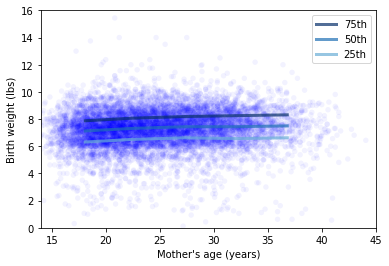

In [21]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import brfss
import first

import thinkstats2
import thinkplot

#Creating dataframe with all live births that are either the first birth or any other. 
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

#Creating variables for mother's age as well as weights for all live births
ages = live.agepreg
weights = live.totalwgt_lb

#Create scatter plot of birth weight vs mother's age
def ScatterPlot(ages, weights, alpha = 1, s= 20):
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 47],
                     ylim=[0, 16],
                     legend=False)
    
ScatterPlot(ages, weights, alpha=0.05, s=10) #This hasn't really told me much as everything is very centered in the 15-35 age range along with 6-10lb birth weight range

#Plot the percentiles of birth weight against the mother's age
def BinnedPercentiles(df):
    #Creating bins for mother's age
    bins = np.arange(10, 47, 5)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)
    
    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]
    #Creating percentile groups of 25, 50, and 75 for birth weights
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)
    #Need labels for the plot 
    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)
    
BinnedPercentiles(live) #Looking at the solution code I see a non-linear relationship. I'm not able to see that quite as well with mine because it was added over top my scatterplot, and I can't figure out how to break those up into separate plots. 

#Compute Pearson's and Spearman's correlations
#Define Covariance pg 84 from the book
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
#Define Pearson's Correlation page 85 from the book
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
#Define Spearman's Correlation pg 87 from the book
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')
#Show the Pearson and Spearman correlation for mother's age against baby's weight. 
print('Corr', Corr(ages, weights))
print('SpearmanCorr', SpearmanCorr(ages, weights))
#Both Pearson's and Spearmna's prove the non-linear relationship